In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [81]:
fire_calls=pd.read_csv('DataSets/Stadium Impact/Fire_Department_Calls_for_Service.csv')

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial Data Exploration - Police Incidents from 2018 - 2020

In [3]:
fire_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243306 entries, 0 to 5243305
Data columns (total 44 columns):
Call Number                                             int64
Unit ID                                                 object
Incident Number                                         int64
Call Type                                               object
Call Date                                               object
Watch Date                                              object
Received DtTm                                           object
Entry DtTm                                              object
Dispatch DtTm                                           object
Response DtTm                                           object
On Scene DtTm                                           object
Transport DtTm                                          object
Hospital DtTm                                           object
Call Final Disposition                                  object
Availab

In [82]:
fire_calls.isnull().sum()

Call Number                                                   0
Unit ID                                                       0
Incident Number                                               0
Call Type                                                     0
Call Date                                                     0
Watch Date                                                    0
Received DtTm                                                 0
Entry DtTm                                                    0
Dispatch DtTm                                                 0
Response DtTm                                            415412
On Scene DtTm                                           1187030
Transport DtTm                                          3861470
Hospital DtTm                                           3996466
Call Final Disposition                                        0
Available DtTm                                            76960
Address                                 

## Data Cleaning
**Looks like there are some null values in the Zip Codes columns, let's see if we can rectify large groups of zipcodes that may be related to Dogpatch/Mission Bay**

In [5]:
fire_calls[fire_calls['Zipcode of Incident'].isnull()].groupby('Address').count().sort_values('Call Type', ascending=False).head(5)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated
Address,,,,,,,,,,,,,,,,,,,,,
CALL BOX: SF INTERNATIONAL AIRPORT,11063,11063,11063,11063,11063,11063,11063,11063,11063,2949,...,0,0,0,0,11063,0,0,0,0,0
CALL BOX:,745,745,745,745,745,745,745,745,745,652,...,57,0,0,0,738,0,0,0,0,0
JOHN MUIR DR/LAKE MERCED BL,295,295,295,295,295,295,295,295,295,275,...,0,0,0,0,295,0,0,0,0,0
4TH ST/CHANNEL ST,209,209,209,209,209,209,209,209,209,192,...,209,209,209,0,209,0,209,0,0,0
"CALL BOX: INTERSTATE 80 EB/ALAMEDA COUN,SF",187,187,187,187,187,187,187,187,187,156,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Cleaned about 600 values that relate to dogpatch/mission bay:
fire_calls.loc[fire_calls['Address']=='4TH ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='3RD ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/4TH ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/3RD ST', 'Zipcode of Incident']=94158

In [7]:
#Adding Month & Year
import calendar
fire_calls['Call Date'] = pd.to_datetime(fire_calls['Call Date'])
fire_calls['Call Month'] = fire_calls['Call Date'].transform(lambda x: x.month)
fire_calls['Call Year'] = fire_calls['Call Date'].transform(lambda x: x.year)
fire_calls['Month-Year'] = fire_calls['Call Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
min_date=fire_calls['Call Date'].min()
max_date=fire_calls['Call Date'].max()
print(f"min:{min_date}, max: {max_date}")

min:2000-04-12 00:00:00, max: 2020-03-27 00:00:00


In [8]:
#Getting an idea of monthly Fire Department Call Volume for All of SF
fire_calls.sort_values('Call Date').groupby(['Call Year','Call Month']).count()['Call Date'].tail(20)

Call Year  Call Month
2018       8             25341
           9             24602
           10            26536
           11            26307
           12            26014
2019       1             24440
           2             24640
           3             26752
           4             25321
           5             25760
           6             27161
           7             25465
           8             27463
           9             28521
           10            29209
           11            26493
           12            28630
2020       1             27677
           2             26171
           3             22979
Name: Call Date, dtype: int64

**Normalizing the data to account for population changes**

Note: Used all of SF annual population for normalizing, not drilled down to Dogpatch/Mission Bay populations.

In [9]:
fire_calls['Norm'] = 1
year= np.arange(2000,2020+1)
pop=[777340,777613,755862,757638,750133,748846,751431,758348,767067,774347,805463,812826,825865,837442,852469,
     864816,883305,884363,883305,881549,884363]
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')
for idx in range(0,len(sf_pop_df)):
    fire_calls.loc[fire_calls['Call Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

## Reducing the dataset to only include call types and zip codes of interest

In [10]:
zipcodes_of_interest = ['94107','94103', '94158', '94105']
calltypes_of_interest = ['Marine Fire','Train / Rail Incident', 'Odor (Strange / Unknown)', 'Explosion','Traffic Collision','Alarms', 'Structure Fire', 'Other', 'Medical Incident']

In [11]:
mbdp_fire= fire_calls[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm", 'Received DtTm']][(
    fire_calls['Zipcode of Incident'].isin(zipcodes_of_interest))&(
    fire_calls['Call Type'].isin(calltypes_of_interest))].sort_values('Call Date')

In [12]:
#Getting an idea of the typical monthly call volume in Mission Bay & Dogpatch
years = mbdp_fire['Call Year'].sort_values().unique()
months = mbdp_fire['Call Month'].sort_values().unique()
mbdp_fire.groupby(['Call Year','Call Month']).count()['Norm'].tail(20)

Call Year  Call Month
2018       8             4953
           9             5057
           10            4975
           11            4979
           12            5159
2019       1             4886
           2             5021
           3             5389
           4             5146
           5             5308
           6             5584
           7             5158
           8             5889
           9             5865
           10            5959
           11            5493
           12            6102
2020       1             5728
           2             5454
           3             4673
Name: Norm, dtype: int64

# Exploratory Data Analysis

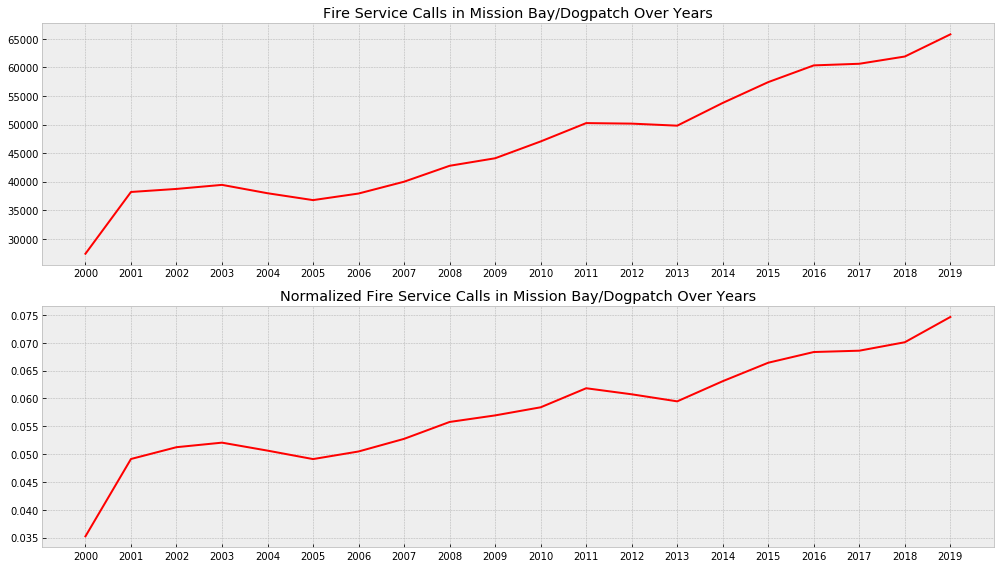

In [13]:
#Looking into Call Volumes over time
mbdplt2019 = mbdp_fire[mbdp_fire['Call Year']<2020]

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby(['Call Year']).count()['Call Date'], color='red')
ax[0].set_xticks(mbdplt2019['Call Year'].unique())
ax[0].set_title('Fire Service Calls in Mission Bay/Dogpatch Over Years')
ax[1].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby('Call Year').sum()['Norm'], color='red')
ax[1].set_xticks(mbdplt2019['Call Year'].unique())
ax[1].set_title('Normalized Fire Service Calls in Mission Bay/Dogpatch Over Years')
plt.savefig('Graphs/Fire_Calls_2000-2020.png', dpi=300)
plt.tight_layout()
plt.show()


## It appears that unlike Police Incidents, which are trending down with normalization, Fire Service Calls in Mission Bay/ Dogpatch are trending up.

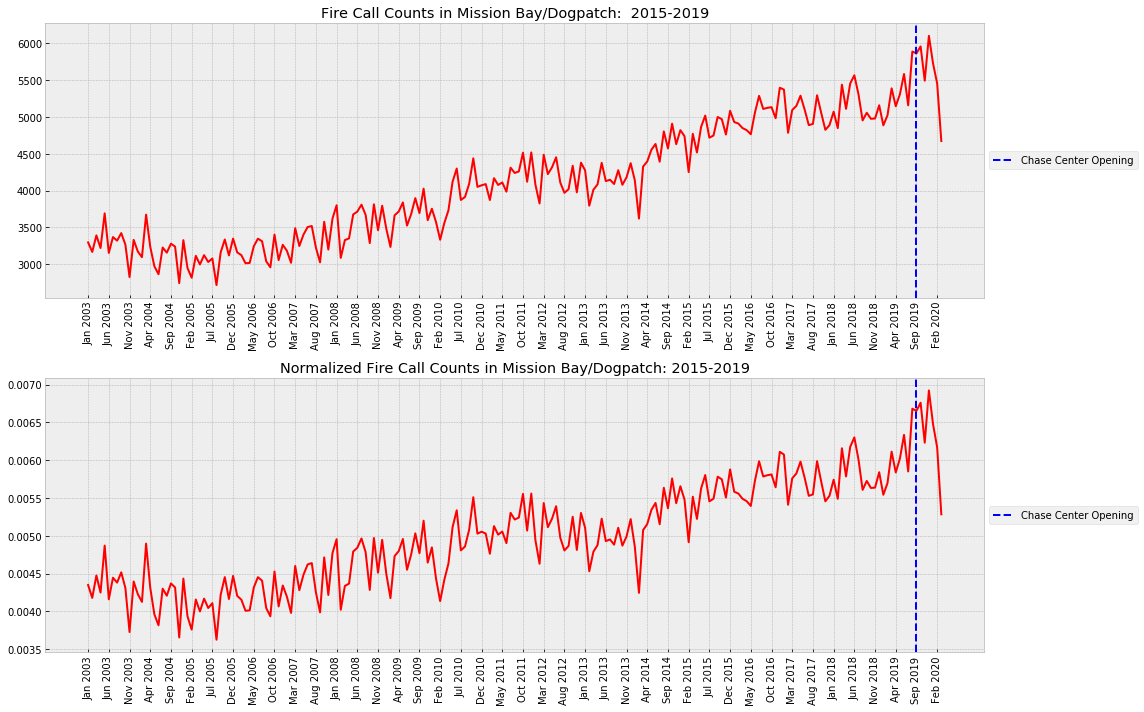

In [115]:
date_range = pd.date_range(start='2003-01-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)].sort_values('Call Date')
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Fire Call Counts in Mission Bay/Dogpatch:  2015-2019')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique()[::5])
ax[0].set_xticklabels(mbdpjul19['Month-Year'].unique()[::5], rotation='vertical')
ax[0].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).sum()['Norm'], color='red')
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in Mission Bay/Dogpatch: 2015-2019')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique()[::5])
ax[1].set_xticklabels(mbdpjul19['Month-Year'].unique()[::5], rotation='vertical')
ax[1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
# plt.savefig('Graphs/FireCalls2015-2020.png', dpi=300)

### Still seeing the quarterly seasonality that we also see with Police Incidents

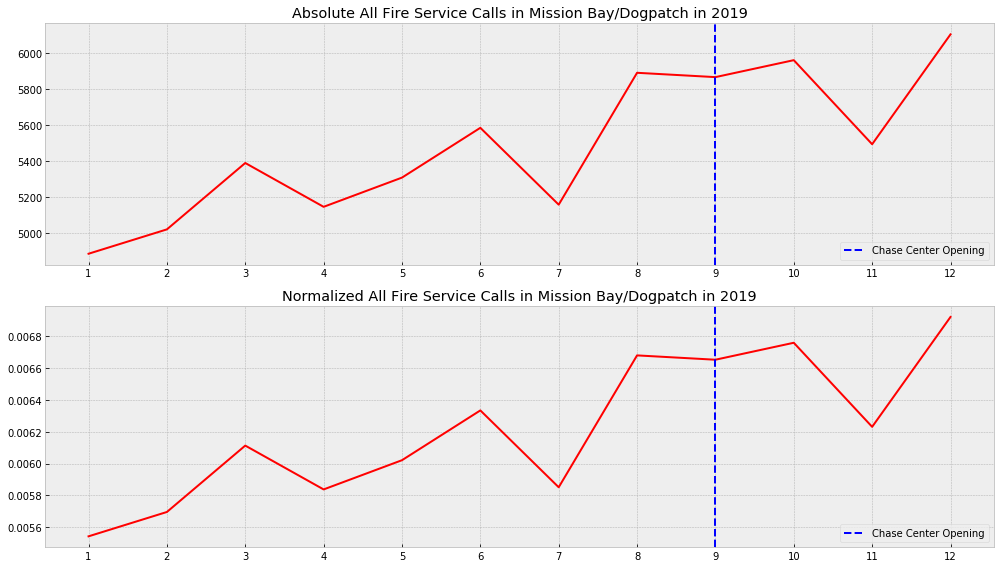

In [73]:
year = 2019
df = mbdp_fire[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm"]][(
    mbdp_fire['Zipcode of Incident'].isin(zipcodes_of_interest))].sort_values('Call Date')
mbdp2019 = df[df['Call Year'] == year].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').count()['Norm'], color='red')
ax[0].set_xticks(mbdp2019['Call Month'].unique())
ax[0].set_title(f'Absolute All Fire Service Calls in Mission Bay/Dogpatch in {year}')
if year == 2019:
    ax[0].axvline(9,color='blue',ls='--',label='Chase Center Opening')
    ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month').sum()['Norm'],color='red')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title(f'Normalized All Fire Service Calls in Mission Bay/Dogpatch in {year}')
if year == 2019:
    ax[1].axvline(9,color='blue',ls='--',label='Chase Center Opening')
    ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2018allfirecalls.png',dpi=300)
plt.show()

## What about Mission Bay & Dogpatch after The Chase Stadium Opened?

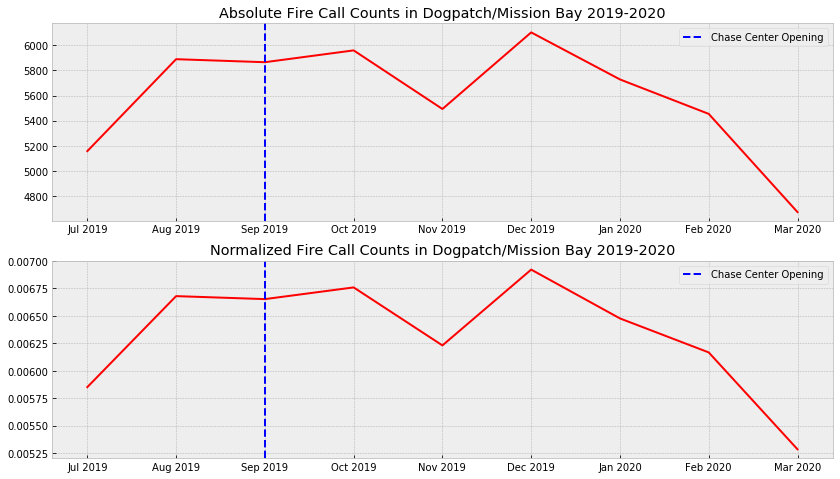

In [80]:
#Looking at Call Volumes after the Chase Center Opened
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)].sort_values('Call Date')
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Absolute Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique())
ax[0].legend(loc='best')
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month']).sum()['Norm'], color='red')
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique())
ax[1].legend(loc='best')
# plt.savefig('Graphs/FireCallsinmbdp2019-2020.png',dpi=300)

### Still appears to be trending down, but this could also be because Fire Department Calls display a quarterly seasonality with peaks and dips per quarter. We would expect to see another peak in April if the dataset continued after April 2020.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


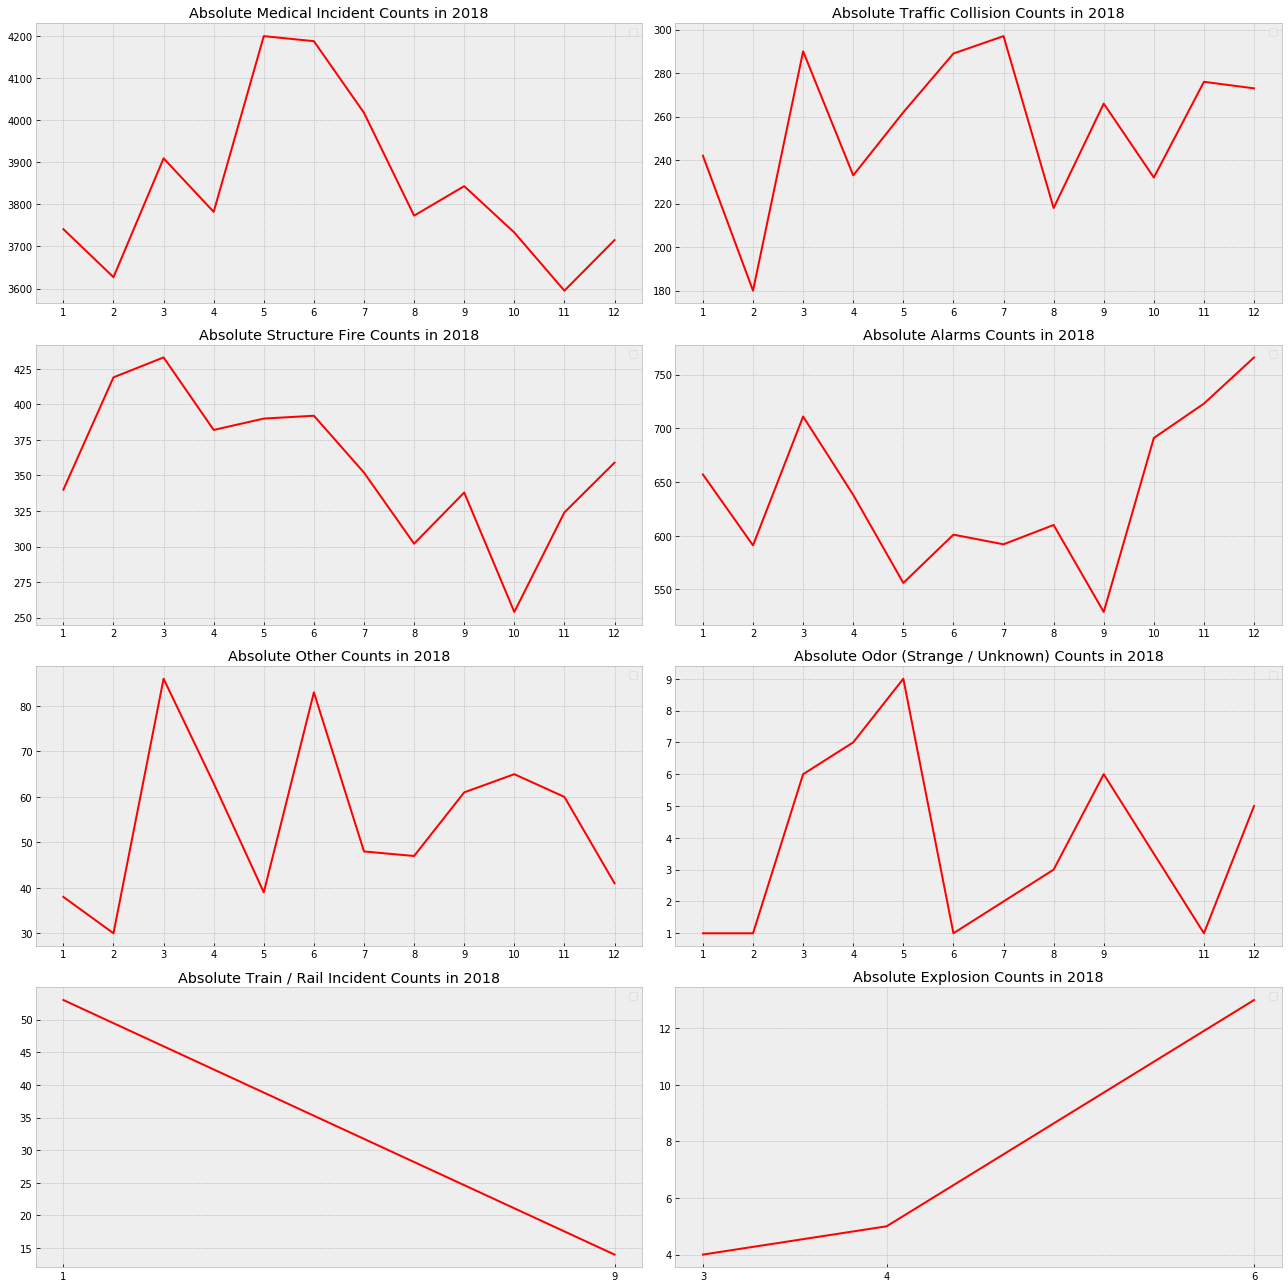

In [23]:
#Absolute
date_range = pd.date_range(start='2018-01-01', end='2018-12-31')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Call Month'].unique(),graph.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2018')
    ax.set_xticks(graph['Call Month'].unique())
    ax.legend(loc='best')
    plt.tight_layout()

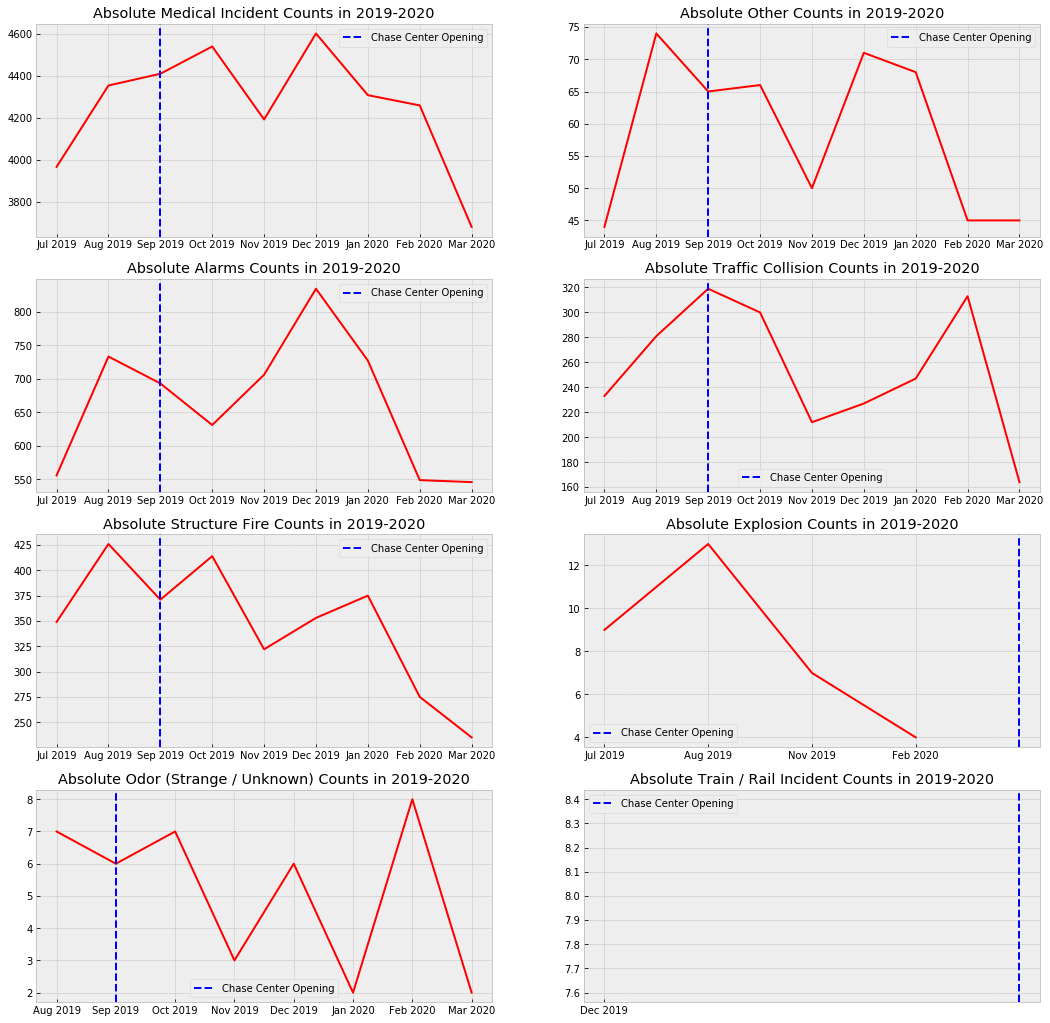

In [74]:
#Absolute
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Month-Year'].unique(),graph.groupby(['Call Year','Call Month']).count()['Call Date'], color='red')
    ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2019-2020')
    ax.set_xticks(graph['Month-Year'].unique())
    ax.legend(loc='best')

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


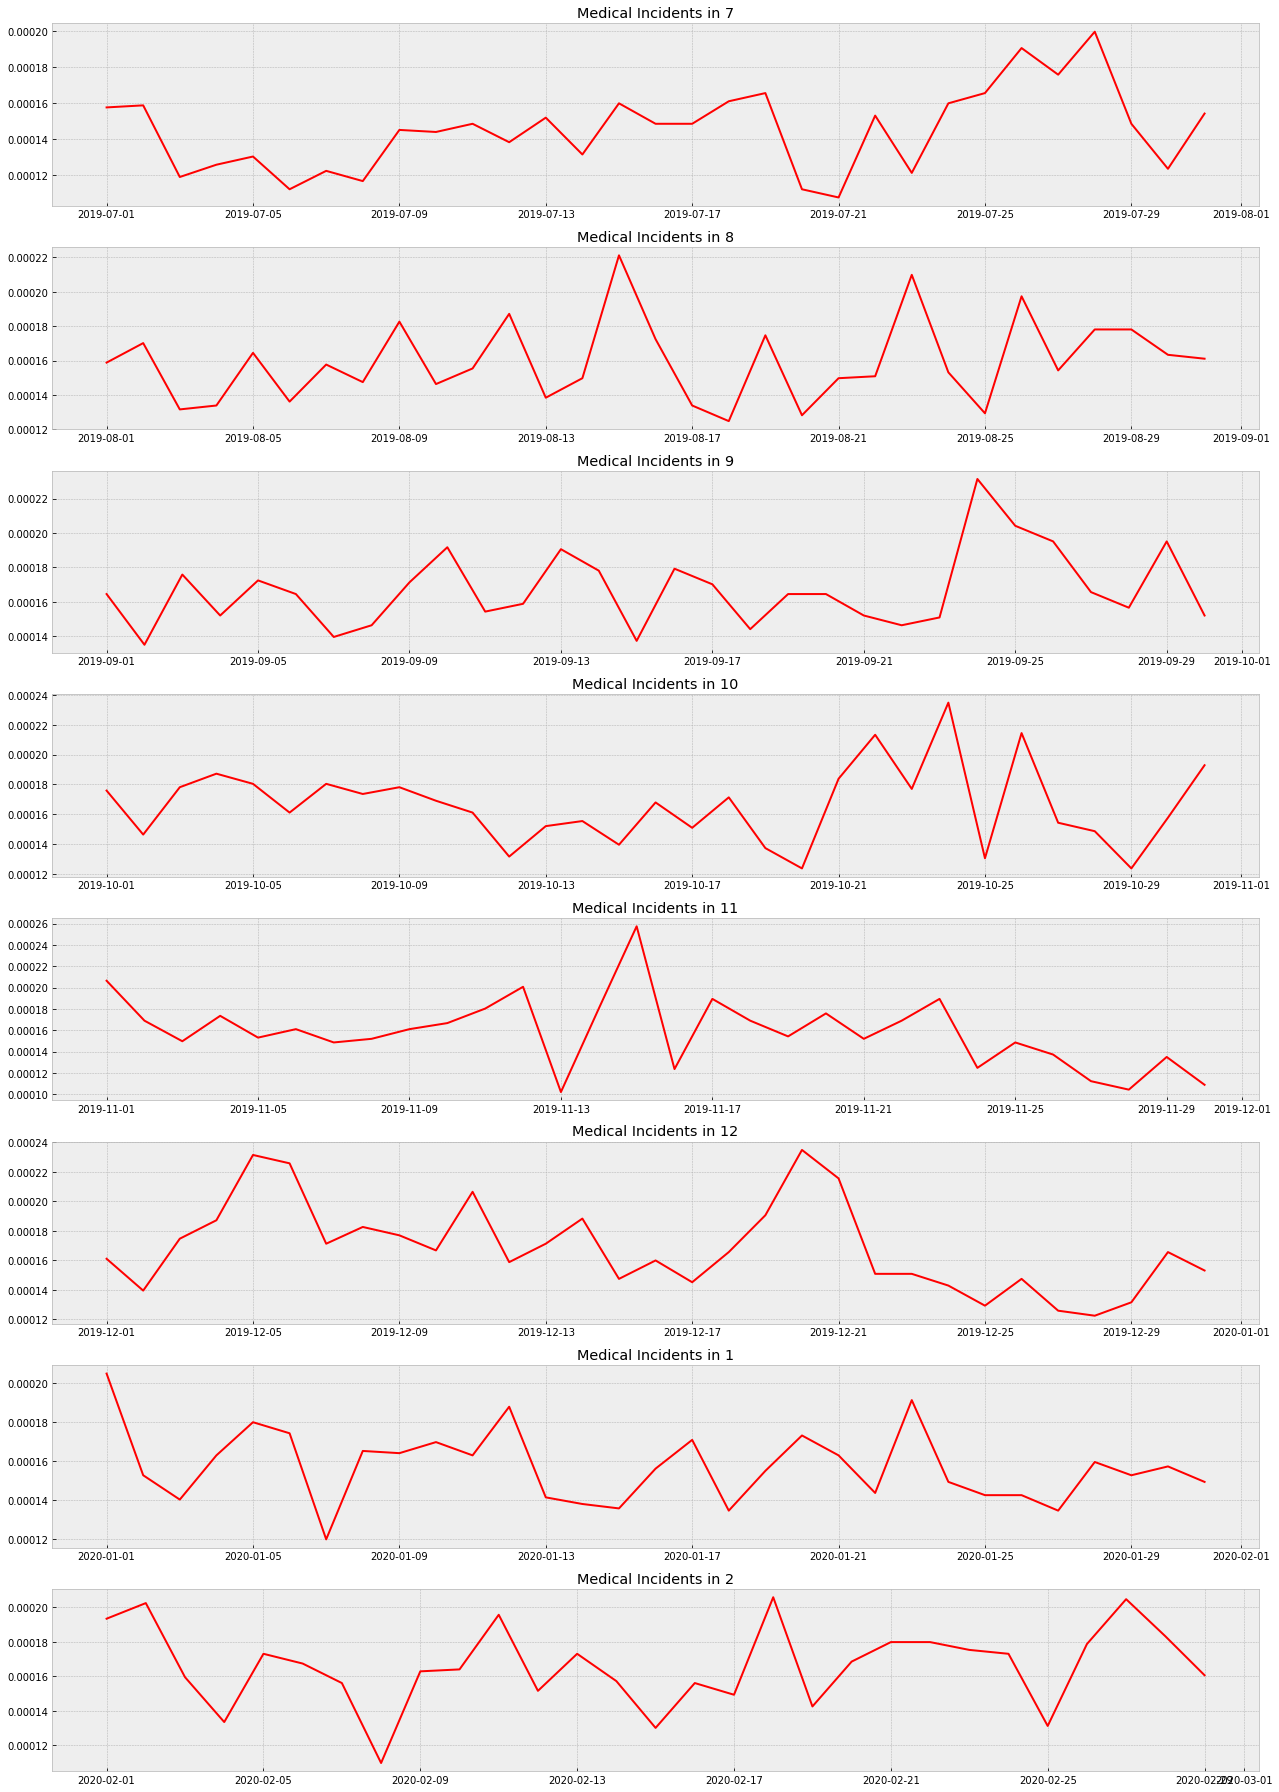

In [75]:
#Next step: Subplots per month for Call Types of interest: Medical Incidents, Alarms, Traffic Collisons
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
months = [7,8,9,10,11,12,1,2]
calls = ['Medical Incidents', 'Traffic Collisons']

fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month']==months[ix]) & (mbdpjul19['Call Type']=='Medical Incident')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').sum()['Norm'], color='red')
    ax.set_title(f'Medical Incidents in {months[ix]}')
fig.tight_layout()

## Takeaways
Per month, fire service calls are fluctuating around a sort of mean, but with peaks and dips per month. Will look into dates after the Chase Center opened, comparing dates on event dates and not on event dates.

## Hypothesis Testing:

**Null Hypothesis:** Average per capita rate of fire service calls on game days will be the same as non-game days

**Alternative Hypothesis:** Average per capita rate of fire service calls on game days will be higher than non-game days

In [54]:
#Import chase event dates
chase_events=pd.read_csv('Chase_Stadium_Events')
chase_events = chase_events.rename(columns = {'date':'Call Date'})
chase_events['Call Date'] = pd.to_datetime(chase_events['Call Date'])
event_dates = chase_events['Call Date'].unique()
chase_events =chase_events[['Call Date','fields.type']]
chase_events['Day of Week'] = chase_events['Call Date'].transform(lambda x: x.dayofweek)
chase_events.groupby('Day of Week').count()['Call Date']

Day of Week
0    10
1     9
2    10
3    12
4     9
5    20
6     7
Name: Call Date, dtype: int64

In [78]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-06', end='2020-03-31')
mbdp2020 = mbdp_fire[(mbdp_fire['Call Date'].isin(date_range))].sort_values('Call Date')
events2020 = mbdp2020[mbdp2020['Call Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Call Date', how='left')
eventdays = len(events2020['Call Date'].unique())
events_group = events2020.groupby(['Call Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Call Date'].unique())
sd_events = np.std(events2020.groupby('Call Date').count()['Norm'])

notevents2020 = mbdp2020[~mbdp2020['Call Date'].isin(event_dates)]
noteventdays = len(notevents2020['Call Date'].unique())
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Call Date'].unique())
sd_not_events = np.std(notevents_group)
se_not_events = sd_not_events/(len(notevents2020['Call Date'].unique())**0.5) #using SD sample to estimate pop
notevents_dist = stats.norm(mean_not_events,se_not_events)

print(f'#Event Dates: {eventdays}, Mean: {mean_events}, SD: {sd_events}')
print(f'#Non-Event Dates: {noteventdays}, Mean: {mean_not_events}, SD: {sd_not_events}')

#Event Dates: 75, Mean: 198.92, SD: 49.81318700906417
#Non-Event Dates: 129, Mean: 184.80620155038758, SD: 27.941544052206446


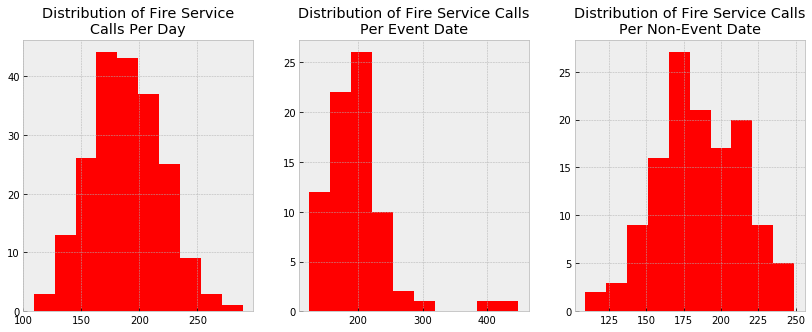

In [58]:
grouped = mbdp2020.groupby('Call Date').count()['Norm']
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(grouped,bins=10, color='red')
ax[0].set_title('Distribution of Fire Service\nCalls Per Day')
ax[1].hist(events_group,bins=10,color='red')
ax[1].set_title('Distribution of Fire Service Calls\nPer Event Date')
ax[2].hist(notevents_group,bins=10,color='red')
ax[2].set_title('Distribution of Fire Service Calls\nPer Non-Event Date')
plt.tight_layout
plt.savefig('graphs/firecallsdistribution.png', dpi=300)

In [59]:
stats.mannwhitneyu(events_group, notevents_group, alternative="greater")
#Based on the Mannwhitney Test Result, events at the Chase Stadium due have higher Fire Service Calls in Dogpatch

MannwhitneyuResult(statistic=5558.0, pvalue=0.03826229745519818)

In [60]:
stats.ttest_ind(notevents_group, events_group, equal_var = False) 
#T-test P-Val

Ttest_indResult(statistic=-2.2419451551359866, pvalue=0.027142549583418996)

## With the high SD, it looks like there could be outliers in the distribution

[Text(0, 0, 'Events_group'), Text(0, 0, 'notevents_group')]

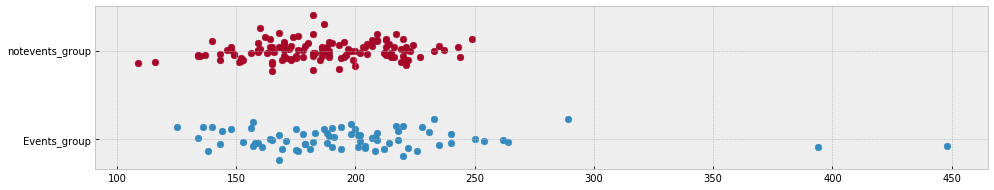

In [61]:
#Let's look into those outliers for CLT
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(events_group, np.repeat(0, len(events_group)) + np.random.normal(0, 0.1, len(events_group)), s=45)
ax.scatter(notevents_group, np.repeat(1, len(notevents_group)) + np.random.normal(0, 0.1, len(notevents_group)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonScatter_fire.png',dpi=300)

Text(0.5, 1.0, 'Distribution of Fire Department Calls on Non-Event & Event Dates')

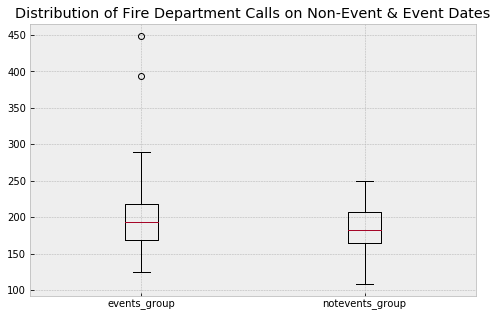

In [62]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([events_group, notevents_group])
ax.set_xticks([1,2])
ax.set_xticklabels(["events_group", "notevents_group"])
ax.set_title('Distribution of Fire Department Calls on Non-Event & Event Dates')
# plt.savefig('Graphs/EventsVsNonBox_fire.png',dpi=300)

## Removing the Outliers
Note: 12/21/2019 & 1/11/2020 high counts of X....XXX If more time, I would look into these events more. Would also look into times of events.

In [63]:
events2020.groupby('Call Date').count()['Norm'].sort_values(ascending=False)

Call Date
2019-12-21    448
2020-01-11    394
2019-12-05    289
2019-11-15    264
2020-03-05    262
             ... 
2019-12-28    140
2020-01-14    138
2020-02-08    136
2019-11-29    134
2019-11-27    125
Name: Norm, Length: 75, dtype: int64

In [64]:
#Removing 2 outliers from events
outlier_dates = ['2019-12-21', '2020-01-11']
new_events2020 = events2020[~events2020['Call Date'].isin(outlier_dates)]
new_events_group = new_events2020.groupby(['Call Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Call Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Call Date').count()['Norm'])
se_events_new = sd_events_new/(len(new_events_group)**0.5)
new_events_dist = stats.norm(mean_events_new, se_events_new)#standard_error
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Fire Calls per day, {se_events_new} SE')

Event Dates at Chase Stadium have on average 192.83561643835617 Fire Calls per day, 3.953711041499308 SE


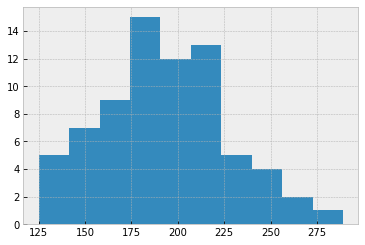

In [65]:
new_events_group.hist()
#also follows normal-ish distribution

## Methodology
<br> Because the two sample sizes and SD are very different among the two samples, I will use the Non-Parametric MannWhitney U Test, and Welch's T-Test for hypothesis Testing

In [66]:
#Redo the mannwhitneyU without outliers, MannWhitneyUResult now indicates insignificant
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5300.0, pvalue=0.06931628806559982)

In [67]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval
#T-test P-Val

0.04449000946385685

In [68]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 1.72


In [69]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
df

127.77167360381324

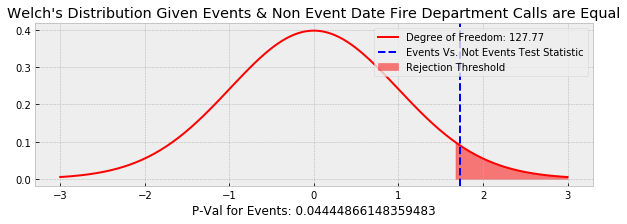

In [71]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(10, 3))
notevents_dist = stats.t(df)
p_val = (1-notevents_dist.cdf(test_statistic-0.01))
critical_val = notevents_dist.ppf(0.95)
ax.plot(x, notevents_dist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df), color='red')
ax.fill_between(x, notevents_dist.pdf(x), where=(x >= critical_val), color="red", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='blue', ls='--', label='Events Vs. Not Events Test Statistic')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal")
# plt.savefig('graphs/EventsVsNonHypotheisTest_Fire.png')

### Based on these results, there appears to be a significant difference in Police Incidents between Event Dates and Non Event Dates.

## What About Shelter In Place 3/19/2020+?

In [79]:
date_range = pd.date_range(start='2019-09-01', end='2020-03-19')
mbdp2020 = mbdp_fire[(mbdp_fire['Call Date'].isin(date_range))].sort_values('Call Date')
events2020 = mbdp2020[mbdp2020['Call Date'].isin(event_dates)]
notevents2020 = mbdp2020[~mbdp2020['Call Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Call Date', how='left')

In [43]:
events_group = events2020.groupby(['Call Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Call Date'].unique())
sd_events = np.std(events2020.groupby('Call Date').count()['Norm'])
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Call Date'].unique())
sd_not_events = np.std(notevents_group)
se_not_events = sd_not_events/(len(notevents2020['Call Date'].unique())**0.5) #using SD sample to estimate pop
notevents_dist = stats.norm(mean_not_events,se_not_events)
outlier_dates = ['2019-12-21', '2020-01-11']
new_events2020 = events2020[~events2020['Call Date'].isin(outlier_dates)]
new_events_group = new_events2020.groupby(['Call Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Call Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Call Date').count()['Norm'])
se_events_new = sd_events_new/(len(new_events_group)**0.5)
new_events_dist = stats.norm(mean_events_new, se_events_new)#standard_error

In [44]:
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5004.0, pvalue=0.15074433900600526)

In [45]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval

0.11199080102642549

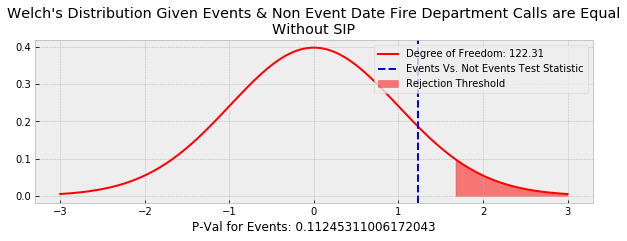

In [53]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(10, 3))
notevents_dist = stats.t(df)
p_val = (1-notevents_dist.cdf(test_statistic-0.01))
critical_val = notevents_dist.ppf(0.95)
ax.plot(x, notevents_dist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df),color='red')
ax.fill_between(x, notevents_dist.pdf(x), where=(x >= critical_val), color="red", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='blue', ls='--', label='Events Vs. Not Events Test Statistic')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Fire Department Calls are Equal\nWithout SIP")
# plt.savefig('graphs/EventsVsNonHypotheisTest_FireWOSIP.png')

## Shelter In Place has helped to bring the crime rate down for Non-Event Dates, making the difference between Event & Non-Event Dates seem bigger than it is.
<br>**Based on these results, we can conclude that Event Dates & Non-Event Dates have the same rate of police incidents, however Shelter In Place appears to have a difference in rate from pre-Shelter In Place.**

## What about concert versus basketball?

In [47]:
chase_events.tail()

,Call Date,fields.type,Day of Week
72,2019-09-16,cce,0
73,2019-09-13,cce,4
74,2019-09-15,cce,6
75,2019-09-11,cce,2
76,2019-09-06,cce,4


In [48]:
bball_dates = chase_events[chase_events['fields.type']=='gsw']['Call Date'].unique()
concert_dates = chase_events[chase_events['fields.type']=='cce']['Call Date'].unique()
bball_events = new_events2020[new_events2020['Call Date'].isin(bball_dates)]
concert_events = new_events2020[new_events2020['Call Date'].isin(concert_dates)]

In [49]:
bball_group = bball_events.groupby('Call Date').count()['Norm']
concert_group = concert_events.groupby('Call Date').count()['Norm']
bball_mean = np.mean(bball_group)
bball_sd = np.std(bball_group)
bball_se = bball_sd/(np.sqrt(len(bball_group)))
concert_mean = np.mean(concert_group)
concert_sd = np.std(concert_group)
concert_se = concert_sd/np.sqrt(len(concert_group))
print(f'Bball Mean: {bball_mean}, Concert Mean: {concert_mean}')
print(f'Bball sd: {bball_sd}, Concert sd: {concert_sd}')
print(f'Bball se: {bball_se}, Concert Mean: {concert_se}')

Bball Mean: 187.97297297297297, Concert Mean: 197.83333333333334
Bball sd: 34.115453014794845, Concert sd: 32.6874933609511
Bball se: 5.608545927095771, Concert Mean: 5.447915560158517


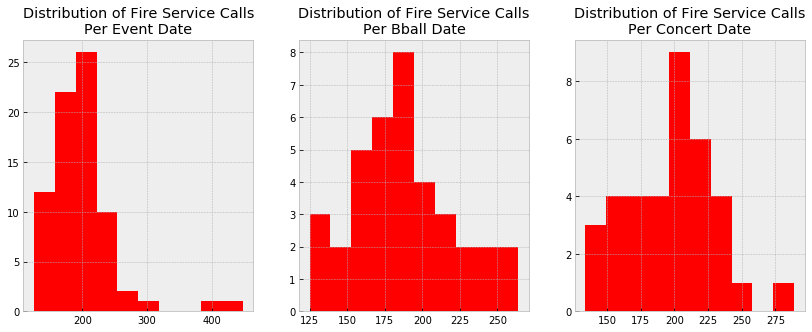

In [50]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(events_group,bins=10,color='red')
ax[0].set_title('Distribution of Fire Service Calls\nPer Event Date')
ax[1].hist(bball_group,bins=10,color='red')
ax[1].set_title('Distribution of Fire Service Calls\nPer Bball Date')
ax[2].hist(concert_group,bins=10,color='red')
ax[2].set_title('Distribution of Fire Service Calls\nPer Concert Date')
plt.tight_layout
plt.savefig('graphs/firecallsbballconcertdist.png', dpi=300)

In [51]:
stats.mannwhitneyu(concert_group, bball_group, alternative="greater")

MannwhitneyuResult(statistic=794.5, pvalue=0.0789024636859117)

In [52]:
T_test_Pval_two_tail = stats.ttest_ind(concert_group, bball_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
print(f'The P-Val for Concert to Bball Events is: {T_test_Pval}')

The P-Val for Concert to Bball Events is: 0.10885125140300968


### There appears to be no difference between the impact of Basketball Events and Concerts.